In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)

# setup a mplsoccer FontManager to download google fonts (SigmarOne-Regular)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')


In [2]:
df= pd.read_csv("Scraped_Data/hol-vs-eng.csv")

In [3]:
df.head()

,player,isHome,shotType,incidentType,xg,x,y,z
0,Ollie Watkins,False,goal,shot,0.100049,8.9,66.0,0
1,Cole Palmer,False,miss,shot,0.074470,13.1,62.6,0
2,Xavi Simons,True,save,shot,0.111154,13.9,55.6,0
3,Wout Weghorst,True,block,shot,0.091810,8.3,48.8,0
4,Denzel Dumfries,True,miss,shot,0.051353,7.9,56.5,0


In [4]:
df['last_name'] = df['player'].apply(lambda x: x.split()[-1])
df['last_name'] = df['player'].apply(lambda x: x.split()[-1])

In [5]:
home_color = "red"
away_color = "blue"

#home_color = "#C8102E"
#away_color = "#0000FF"

# Split df into two parts, one for each team
au_df = df[df["isHome"] == True].copy()
tr_df = df[df["isHome"] == False].copy()


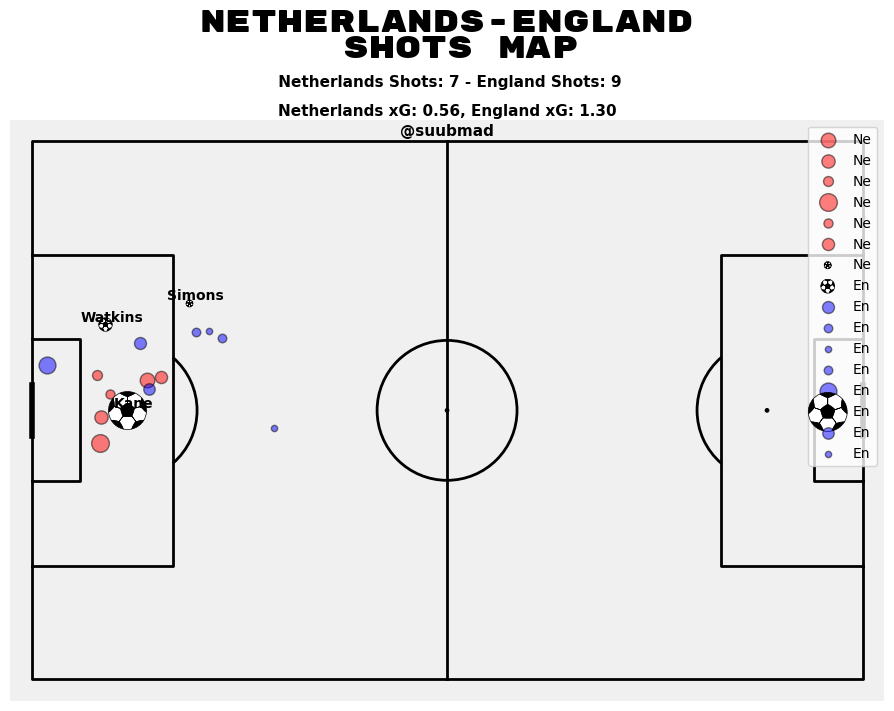

In [9]:
import pandas as pd
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Örnek veri


# Veriyi DataFrame'e dönüştürelim
df = pd.DataFrame(df)

# Pitch (saha) oluşturalım
pitch = Pitch(pitch_type='opta', line_zorder=2, pitch_color='#f0f0f0', line_color='black')

# Sahayı çizelim
fig, ax = pitch.draw(figsize=(10, 7))



#renkler
#au_color = "#C8102E"
#tr_color = "#0000FF"

# Split df into two parts, one for each team
au_df = df[df["isHome"] == True].copy()
tr_df = df[df["isHome"] == False].copy()


# Takım A için şut haritası
for i, row in au_df.iterrows():
    if row['shotType'] == 'goal':
        pitch.scatter(row['x'], row['y'], s=1000 * row['xg'], edgecolors='black',marker='football',c="white", ax=ax,label="Ne")
        ax.annotate(row['last_name'], (row['x'], row['y']), xytext=(5, 5), textcoords='offset points',
                    color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    else:
        pitch.scatter(row['x'], row['y'], s=1000 * row['xg'], color=home_color, alpha=.5, edgecolors='black', ax=ax,label="Ne")

# Takım B için şut haritası
for i, row in tr_df.iterrows():
    if row['shotType'] == 'goal':
        pitch.scatter(row['x'], row['y'], s=1000 * row['xg'], edgecolors='black',marker='football',c='white', ax=ax,label="En")
        ax.annotate(row['last_name'], (row['x'], row['y']), xytext=(5, 5), textcoords='offset points',
                    color='black', fontsize=10, ha='center', va='center', fontweight='bold')
    else:
        pitch.scatter(row['x'], row['y'], s=1000 * row['xg'], color=away_color, alpha=.5, edgecolors='black', ax=ax,label="En")

    
    


#txt = ax.text(x=50, y=120, s='Spain vs France\n Shots map'

txt = ax.text(x=50, y=120, s='Netherlands-England\n Shots Map',
              size=22,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')
# Başlık ekleyelim
# Her takım için toplam şut ve xG hesaplayalım
#is_home_text = 'A' if row['isHome'] else 'B'
#ax.text(row['x'] + 1, row['y'], is_home_text, fontsize=12, color='black', ha='left', va='center')
team_stats = df.groupby('isHome').agg({'player': 'count', 'xg': 'sum'}).rename(columns={'player': 'shots'})
team_stats = team_stats.reset_index()

stat_text = ''
stat_text2=''
stat_text3=''
for i, row in team_stats.iterrows():
    
    stat_text =  f" Netherlands Shots: {df['isHome'].sum()} - England Shots: {len(df) - df['isHome'].sum()}\n"
    stat_text2 =f"Netherlands xG: {au_df['xg'].sum():.2f}, England xG: {tr_df['xg'].sum():.2f}\n"
    stat_text3=f"@suubmad"
    
    
    


# Toplam şut ve xG'yi başlığın altına ekleyelim
ax.text(0.5, 1.05, stat_text, transform=ax.transAxes, fontsize=11, ha='center', va='center', fontweight='bold')
ax.text(0.5, 1.00, stat_text2, transform=ax.transAxes, fontsize=11, ha='center', va='center', fontweight='bold')
ax.text(0.5, .98, stat_text3, transform=ax.transAxes, fontsize=11, ha='center', va='center', fontweight='bold')

# Grafiği gösterelim
ax.legend()
plt.show()